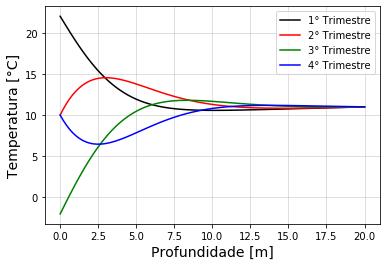

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
D   = 0.1   # [mˆ2/dia] Constante de Difusão da crosta
A   = 10    # [°C]
B   = 12    # [°C]
tau = 365   # [dias]
N   = 100   # Número de pontos no grid
h   = 1e-2  # [dia] Intervalo de tempo 
L   = 20    # [m] Profundidade máxima
a   = L/N   # [m] Espaçamento dos pontos
inc = h/1e2 # [dia] Incerteza

# Função que calcula a temperatura 
# média da terra por dia do ano
def T_mean(t):
    return A + B*np.sin(2*np.pi*t/tau)

# Inicialização do array de temperaturas
T = np.array([10.0]*(N+1), float)
T[0], T[N] = T_mean(0), 11   # Temperatura inicial no topo e fundo da crosta

# Array de pontos da crosta
X = np.linspace(0,20,N+1)

# Evolução da temperatura por um periodo de 9 anos
tempo = h
while tempo <= 365*9:
    T[1:N] = T[1:N] + (D*h/a**2)*(T[2:N+1] + T[0:N-1] - 2*T[1:N])
    T[0] = T_mean(h)
    tempo += h

# Evolução da temperatura no último ano, com intervalos de 3 meses
plt.figure()
t = h
while t < 365:
    T[1:N] = T[1:N] + (D*h/a**2)*(T[2:N+1] + T[0:N-1] - 2*T[1:N])
    T[0] = T_mean(t)
    t += h

    # Perfil da temperatura no primeiro trimestre
    if abs(t - 91.25*1) < inc:
        plt.plot(X,T, '-k', label = "1° Trimestre")

    # Perfil da temperatura no segundo trimestre
    if abs(t - 91.25*2) < inc:
        plt.plot(X,T, '-r', label = "2° Trimestre")
    
    # Perfil da temperatura no terceiro trimestre
    if abs(t - 91.25*3) < inc:
        plt.plot(X,T, '-g', label = "3° Trimestre")
    
    # Perfil da temperatura no quarto trimestre
    if abs(t - 91.25*4) < inc:
        plt.plot(X,T, '-b', label = "4° Trimestre")   

plt.xlabel("Profundidade [m]", size = 14)
plt.ylabel("Temperatura [°C]", size = 14)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best')
plt.show()